# Image et doublons

Material for the hackathon ENSAE / BRGM / 2018. Les images sont extraites de tweets mais sont retweetées sans être retweetées.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Séparation des doublons

Pour le challenge, il faut repérer les doublons dans les images. Pour cela, je zoom chaque image sur un carré 50x50 en noir et blanc, suivi d'une ACP puis k plus proches voisins pour détecter les doublons.

### Images en gris 50x50

In [3]:
folder = "c:/temp/suricatenat_images"

In [4]:
from ensae_projects.hackathon.image_helper import apply_image_transform, image_zoom, img2gray

dest_folder = "img5050"
list(apply_image_transform(folder, dest_folder, lambda img: image_zoom(img2gray(img), (50, 50)), fLOG=print))

### Images en features

Pas utilisé par la suite.

In [5]:
from ensae_projects.hackathon.image_helper import stream_image2features
import numpy

dest_folder = "img5050"
dest_batch = "batch"
for b in stream_image2features(dest_folder, dest_batch, numpy.array, fLOG=print):
    pass

### voisins

In [6]:
%matplotlib inline

In [7]:
from ensae_projects.hackathon.image_knn import ImageNearestNeighbors
folder = "img5050"
knn = ImageNearestNeighbors()
knn.fit(folder, fLOG=print)

[ImageNearestNeighbors] processing image 0: 'inondation_2016\735614357036519425_CjVtTTrUoAAUUZp.jpg' - class 'inondation_2016'
[ImageNearestNeighbors] processing image 1000: 'inondation_2016\737596119933321217_Cjx3w1FVAAAyyY1.jpg' - class 'inondation_2016'
[ImageNearestNeighbors] processing image 2000: 'inondation_2016\737891662077255685_Cj2EjjXWUAA8Dhq.jpg' - class 'inondation_2016'
[ImageNearestNeighbors] processing image 3000: 'inondation_2016\738050337521709056_Cj4UpFDUoAIR2gD.jpg' - class 'inondation_2016'
[ImageNearestNeighbors] processing image 4000: 'inondation_2016\738283056302313472_Cj7oe7VWkAAPwAT.jpg' - class 'inondation_2016'
[ImageNearestNeighbors] processing image 5000: 'inondation_2016\738366585526718464_Cj80fFNXEAAx9T2.jpg' - class 'inondation_2016'
[ImageNearestNeighbors] processing image 6000: 'inondation_2016\738439428159377408_Cj92vvAUYAARP2A.jpg' - class 'inondation_2016'
[ImageNearestNeighbors] processing image 7000: 'inondation_2016\738629637845221376_CkAjvUFVAA

In [8]:
from ensae_projects.hackathon.image_helper import enumerate_image_class
folder = "img5050"
iter = enumerate_image_class(folder)
imgs = [_[0] for _ in zip(iter, range(0,1000000))]
len(imgs)

44053

In [9]:
for i, img in enumerate(imgs):
    dist, ind = knn.kneighbors(img[0])
    if dist[0, 1] <= 10:
        print("dist =", dist)
        print("ind =", ind)
        break

dist = [[  0.           0.           7.93725393 366.16662874 380.73481585]]
ind = [[   12     3    10 21464  8684]]


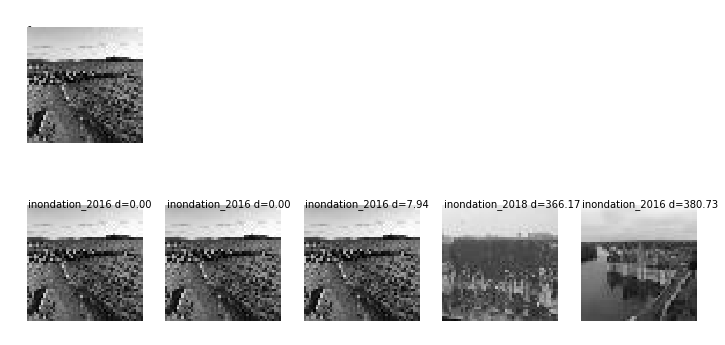

In [10]:
knn.plot_neighbors(ind, dist, obs=img[0], folder_or_images=folder);

In [11]:
pairs = []
for i, img in enumerate(imgs):
    if i % 1000 == 0:
        print("{0}/{1} done".format(i, len(imgs)))
    dist, ind = knn.kneighbors(img[0])
    sub = ind.ravel()[dist.ravel() <= 10]
    if len(sub) > 0:
        for j in sub:
            pairs.append((i, j))

0/44053 done
1000/44053 done
2000/44053 done
3000/44053 done
4000/44053 done
5000/44053 done
6000/44053 done
7000/44053 done
8000/44053 done
9000/44053 done
10000/44053 done
11000/44053 done
12000/44053 done
13000/44053 done
14000/44053 done
15000/44053 done
16000/44053 done
17000/44053 done
18000/44053 done
19000/44053 done
20000/44053 done
21000/44053 done
22000/44053 done
23000/44053 done
24000/44053 done
25000/44053 done
26000/44053 done
27000/44053 done
28000/44053 done
29000/44053 done
30000/44053 done
31000/44053 done
32000/44053 done
33000/44053 done
34000/44053 done
35000/44053 done
36000/44053 done
37000/44053 done
38000/44053 done
39000/44053 done
40000/44053 done
41000/44053 done
42000/44053 done
43000/44053 done
44000/44053 done


In [12]:
pairs[:10]

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 12),
 (3, 3),
 (3, 10),
 (4, 4),
 (5, 133),
 (5, 1549),
 (5, 158)]

In [13]:
pairs2 = [(i,j) for i,j in pairs if i != j]
len(pairs), len(pairs2)

(75725, 33675)

In [14]:
pairs2[:10]

[(3, 12),
 (3, 10),
 (5, 133),
 (5, 1549),
 (5, 158),
 (5, 5632),
 (5, 16784),
 (8, 14699),
 (8, 23),
 (8, 35)]

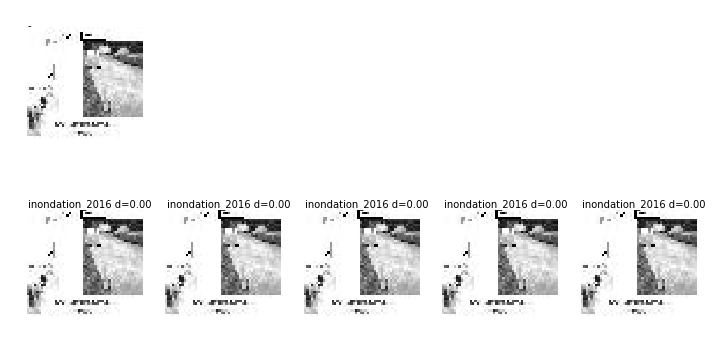

In [15]:
dist, ind = knn.kneighbors(imgs[5][0])
knn.plot_neighbors(ind, dist, obs=imgs[5][0], folder_or_images=folder);

### Composantes connectes

In [16]:
distincts = []
for i, j in pairs2:
    distincts.append(i)
    distincts.append(j)
distincts = set(distincts)
connex = {}
for k in distincts:
    connex[k] = k

n = 0
while n < 10:
    modif = 0
    for i, j in pairs2:        
        a = min(connex[i], connex[j])
        if a != connex[i] or a != connex[j]:
            modif += 1
        connex[i] = connex[j] = a
    print(n, modif)
    n += 1

0 9096
1 6
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0


In [17]:
len(connex), len(set(connex.values()))

(13271, 4185)

In [18]:
names = knn.image_names_
names[:2]

['inondation_2016/735614357036519425_CjVtTTrUoAAUUZp.jpg',
 'inondation_2016/735616090261184512_CjVu73ZVEAAlWmu.jpg']

In [19]:
dups = []
for i, j in connex.items():
    if i != j:
        dups.append(names[i])
len(dups)

9086

### Images très proches

In [20]:
for i, img in enumerate(imgs):
    dist, ind = knn.kneighbors(img[0])
    if 10 < dist[0, 1] <= 30:
        print("dist =", dist)
        print("ind =", ind)
        break

dist = [[  0.          21.97726098  21.97726098  21.97726098 161.13348504]]
ind = [[ 285  308  351  311 3005]]


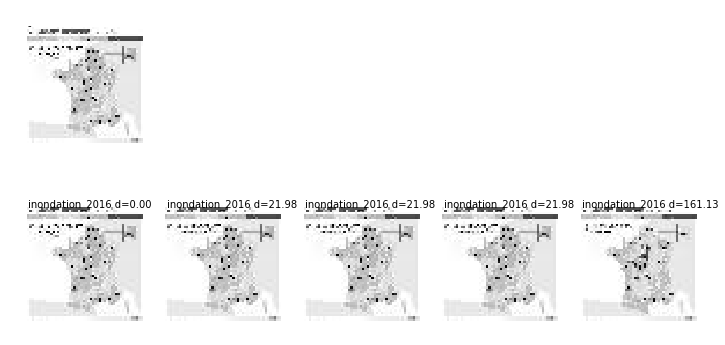

In [21]:
obs = imgs[ind[0, 0]][0]
knn.plot_neighbors(ind, dist, obs=obs, folder_or_images=folder);

### Recopie de la base

In [22]:
not_allowed = set(dups)
len(not_allowed)

9086

In [23]:
list(sorted(not_allowed))[:5]

['inondation_2016/735805396657397762_CjYbG-DUgAQTu19.jpg',
 'inondation_2016/735829559329853440_CjYxFcrXEAAvjlH.jpg',
 'inondation_2016/735870604038045696_CjZWafAXEAA3sOb.jpg',
 'inondation_2016/735892072960512000_CjZp8CoWsAIOhL5.jpg',
 'inondation_2016/735892650583306240_CjZqdvoXAAEaSRM.jpg']

In [24]:
from ensae_projects.hackathon.image_helper import stream_copy_images

src_folder = "c:/temp/suricatenat_images/"
dest_folder = "c:/temp/suricatenat_clean/"

def valid(name):
    spl = name.split("suricatenat_images")[-1].replace("\\", "/").strip("/\\")
    return spl not in allowed

for img in stream_copy_images(src_folder, dest_folder, valid, fLOG=print):
    pass

[stream_copy_images] copy image 0: 'bing\01-9.jpg' - class 'bing'
[stream_copy_images] copy image 1000: 'imagenet1\3271012508_955158b073.jpg' - class 'imagenet1'
[stream_copy_images] copy image 2000: 'imagenet2\3287016043_987800dc67.jpg' - class 'imagenet2'
[stream_copy_images] copy image 3000: 'imagenet4\106994_5349_big_200907_voyager11.jpg' - class 'imagenet4'
[stream_copy_images] copy image 4000: 'imagenet5\532346050_dafb11ec86.jpg' - class 'imagenet5'
[stream_copy_images] copy image 5000: 'inondation_2016\736966968138473472_Cjo7jTrXAAAeffo.jpg' - class 'inondation_2016'
[stream_copy_images] copy image 6000: 'inondation_2016\737629970399252480_CjySiGiUkAUr8TC.jpg' - class 'inondation_2016'
[stream_copy_images] copy image 7000: 'inondation_2016\737923554407256064_Cj2hYNwWUAElsOP.jpg' - class 'inondation_2016'
[stream_copy_images] copy image 8000: 'inondation_2016\738072076880347136_Cj4opLHXEAAuuGK.jpg' - class 'inondation_2016'
[stream_copy_images] copy image 9000: 'inondation_2016\7

In [25]:
l1 = list(enumerate_image_class("c:/temp/suricatenat_images/"))

In [26]:
l2 = list(enumerate_image_class("c:/temp/suricatenat_clean/"))

In [27]:
len(l1), len(l2)

(48884, 39798)

### Takes a random sample

In [28]:
from ensae_projects.hackathon.image_helper import stream_random_sample, last_element
rnd = last_element(stream_random_sample("c:/temp/suricatenat_clean/", abspath=False))

In [29]:
rnd[:5]

[('imagenet2\\2611787731_6b65bdaf6a.jpg', 'imagenet2'),
 ('inondation_2016\\740608740169224192_CkcruUEXIAEsWUl.jpg',
  'inondation_2016'),
 ('inondation_2016\\738614580658606080_CkAWBegUgAA5Z9l.jpg',
  'inondation_2016'),
 ('inondation_2018\\956548703552245760_DUZX5TRWsAAyDqH.jpg',
  'inondation_2018'),
 ('inondation_2018\\956925376936148993_DUeuiGQX4AAocq-.jpg',
  'inondation_2018')]

In [30]:
import os
import shutil

src_folder = "c:/temp/suricatenat_clean/"
dest_folder = "c:/temp/suricatenat_sample/"

    
for img, sub in rnd:
    src = os.path.join(src_folder, img)
    dst = os.path.join(dest_folder, img)
    d = os.path.dirname(dst)
    if not os.path.exists(d):
        os.makedirs(d)
    
    shutil.copy(src, dst)